In [1]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


170498071/170498071 [==============================] - 11s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
base_model =VGG19(weights='imagenet',include_top=False,input_shape=(32,32,3))


80134624/80134624 [==============================] - 3s 0us/step


In [5]:
for layer in base_model.layers:
  layer.trainable = False


In [6]:
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 20,292,170
Trainable params: 267,786
Non-trainable params: 20,024,384
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [10]:
model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/40
782/782 [==============================] - 25s 18ms/step - loss: 1.5043 - accuracy: 0.4659 - val_loss: 1.2972 - val_accuracy: 0.5428 - lr: 0.0010
Epoch 2/40
782/782 [==============================] - 14s 18ms/step - loss: 1.3256 - accuracy: 0.5328 - val_loss: 1.2470 - val_accuracy: 0.5572 - lr: 0.0010
Epoch 3/40
782/782 [==============================] - 14s 18ms/step - loss: 1.2695 - accuracy: 0.5522 - val_loss: 1.2225 - val_accuracy: 0.5709 - lr: 0.0010
Epoch 4/40
782/782 [==============================] - 14s 17ms/step - loss: 1.2345 - accuracy: 0.5672 - val_loss: 1.2064 - val_accuracy: 0.5737 - lr: 0.0010
Epoch 5/40
782/782 [==============================] - 14s 18ms/step - loss: 1.2067 - accuracy: 0.5747 - val_loss: 1.1754 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 6/40
782/782 [==============================] - 14s 18ms/step - loss: 1.1859 - accuracy: 0.5798 - val_loss: 1.1742 - val_accuracy: 0.5870 - lr: 0.0010
Epoch 7/40
782/782 [==============================] - 13s 

In [11]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

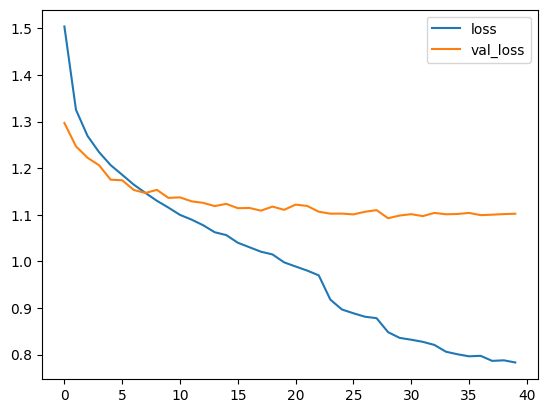

In [12]:
metrics[['loss','val_loss']].plot()

<Axes: >

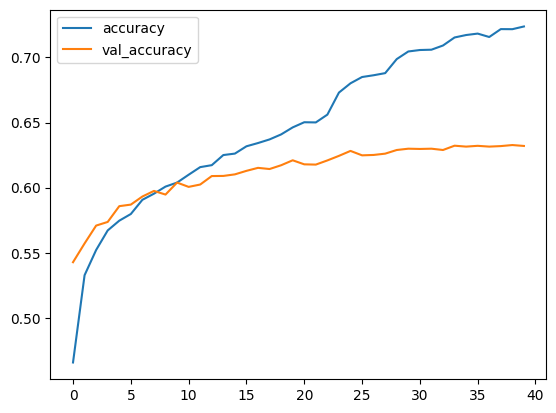

In [13]:

metrics[['accuracy','val_accuracy']].plot()